# Emotion Detection

**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


**Exploring Dataset**

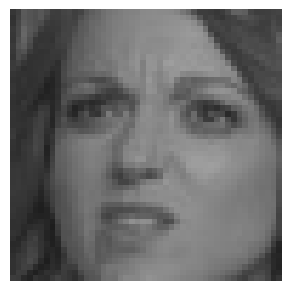

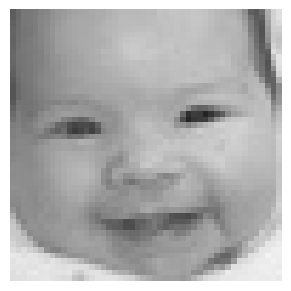

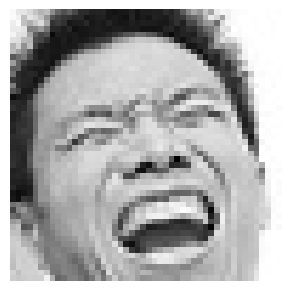

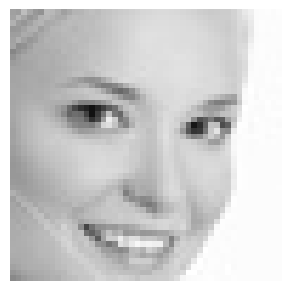

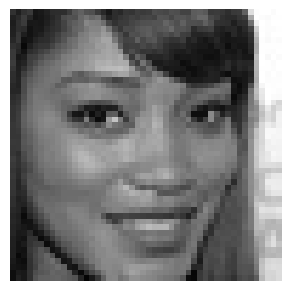

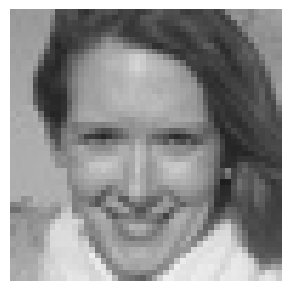

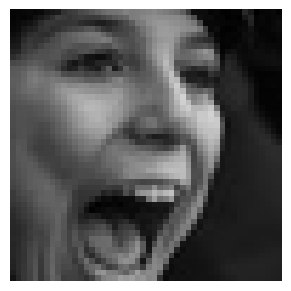

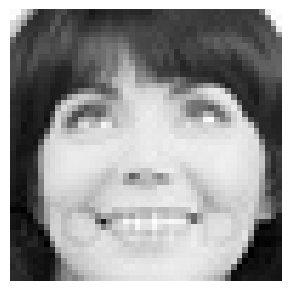

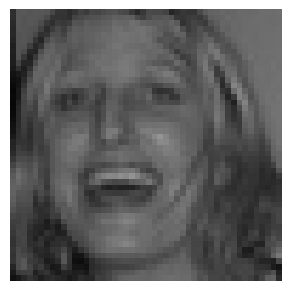

In [2]:
import cv2
import random
from glob import glob
import matplotlib.pyplot as plt

images = glob(r"C:\Users\prasa\OneDrive\Desktop\Emotion detection\FER-2013\train\*\*")
for i in range(9):
    image = random.choice(images)

    plt.figure(figsize=(12, 12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    plt.axis('off')
    plt.show()
    


In [12]:
#from keras.preprocessing.image import ImageDataGenerator


In [5]:
#from keras.preprocessing.image import ImageDataGenerator

#img_size = 48
#batch_size = 64

# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Now you can use ImageDataGenerator and other functionalities from TensorFlow Keras
# Example usage:
img_size = 48
batch_size = 64
# Continue with your code...

# Data generators for training and validation
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(r"C:\Users\prasa\OneDrive\Desktop\Emotion detection\FER-2013\train",
                                                    target_size=(img_size, img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory(r"C:\Users\prasa\OneDrive\Desktop\Emotion detection\FER-2013\test",
                                                              target_size=(img_size, img_size),
                                                              color_mode="grayscale",
                                                              batch_size=batch_size,
                                                              class_mode="categorical",
                                                              shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
images = glob(r"C:\Users\prasa\OneDrive\Desktop\Emotion detection\archive (4)\train\*\*")

In [7]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [8]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [9]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [10]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [15]:
epochs = 50
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
from keras.callbacks import ModelCheckpoint

# Specify filepath with .weights.h5 extension
checkpoint = ModelCheckpoint("model_weights1.weights.h5", 
                             monitor='val_accuracy', 
                             save_weights_only=True, 
                             mode='max', 
                             verbose=1)
callbacks = [checkpoint]



In [ ]:
#checkpoint = ModelCheckpoint("model_weights1.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
#callbacks = [checkpoint]

In [16]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/50


C:\Users\prasa\AppData\Local\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.3081 - loss: 1.8346
Epoch 1: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 96s 203ms/step - accuracy: 0.3082 - loss: 1.8343 - val_accuracy: 0.4335 - val_loss: 1.5189
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:04 143ms/step - accuracy: 0.5156 - loss: 1.3063
Epoch 2: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.5156 - loss: 0.6546 - val_accuracy: 0.5000 - val_loss: 0.8025
Epoch 3/50


C:\Users\prasa\AppData\Local\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4586 - loss: 1.4188
Epoch 3: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 70s 155ms/step - accuracy: 0.4586 - loss: 1.4187 - val_accuracy: 0.4754 - val_loss: 1.3611
Epoch 4/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:13 165ms/step - accuracy: 0.4219 - loss: 1.5157
Epoch 4: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.4219 - loss: 0.7596 - val_accuracy: 0.3000 - val_loss: 0.6886
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5159 - loss: 1.2785
Epoch 5: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 71s 158ms/step - accuracy: 0.5159 - loss: 1.2785 - val_accuracy: 0.5000 - val_loss: 1.3285
Epoch 6/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:13 164ms/step - accuracy: 0.5312 - loss: 1.2640
Epoch 6: saving model to model_weights1.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.5312 - loss: 0.6334 - val_accuracy:

In [17]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.6173 - loss: 1.2688


[1.234850287437439, 0.615631103515625]

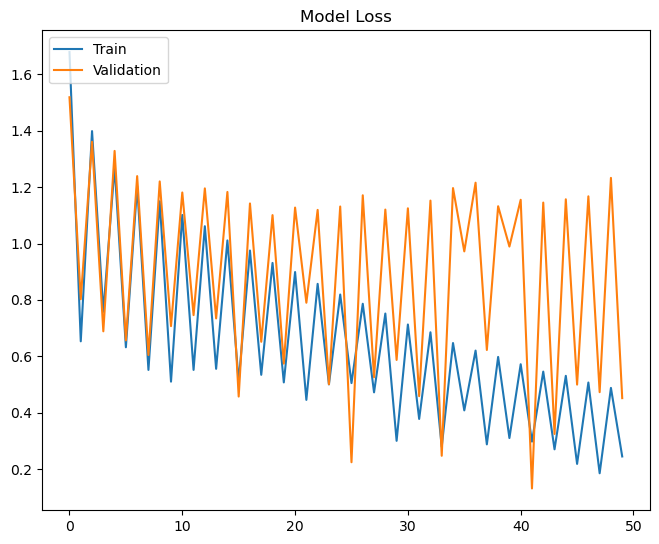

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

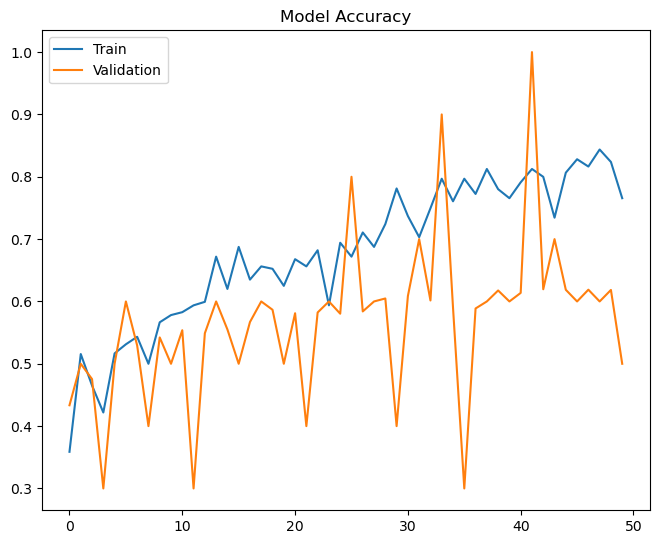

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [20]:
model_json = model.to_json()
with open("model_a2.json","w") as json_file:
    json_file.write(model_json)